In [1]:
#環境確認
import pandas as pd
import numpy as np
import sklearn
!python3 --version
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)

Python 3.6.12 :: Anaconda, Inc.
1.1.1
1.19.1
0.23.2
3.3.1


In [2]:
train_df = pd.read_csv("../data/Processed/train_buki.csv", index_col='id')
test_df = pd.read_csv("../data/Processed/test_buki.csv", index_col="id")
print(train_df.shape)
print(test_df.shape)

(66125, 79)
(28340, 78)


In [3]:
train_df.head()

,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,...,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4
id,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,...,splashbomb,presser,splatcharger,splatcharger,shooter,shooter,quickbomb,kyubanbomb_pitcher,sharp,sharp_neo
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,...,jumpbeacon,bubble,campingshelter,campingshelter,shooter,maneuver,torpedo,chakuchi,sputtery,sputtery_clear
3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,...,splashbomb,nicedama,prime,prime_becchu,shooter,maneuver,splashbomb,amefurashi,dualsweeper,dualsweeper_custom
4,2019-11-11T14:00:00+00:00,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,...,kyubanbomb,curlingbomb_pitcher,promodeler_mg,promodeler_mg,shooter,blaster,robotbomb,jetpack,hotblaster,hotblaster_custom
5,2019-12-14T06:00:00+00:00,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,...,splashbomb,quickbomb_pitcher,bucketslosher,bucketslosher_soda,shooter,shooter,splashbomb,armor,wakaba,wakaba


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66125 entries, 1 to 66125
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period         66125 non-null  object 
 1   game-ver       66125 non-null  object 
 2   lobby-mode     66125 non-null  object 
 3   lobby          66125 non-null  object 
 4   mode           66125 non-null  object 
 5   stage          66125 non-null  object 
 6   A1-weapon      66125 non-null  object 
 7   A1-rank        51681 non-null  object 
 8   A1-level       66125 non-null  int64  
 9   A2-weapon      66125 non-null  object 
 10  A2-rank        51681 non-null  object 
 11  A2-level       66125 non-null  float64
 12  A3-weapon      66125 non-null  object 
 13  A3-rank        51681 non-null  object 
 14  A3-level       66125 non-null  float64
 15  A4-weapon      66074 non-null  object 
 16  A4-rank        51638 non-null  object 
 17  A4-level       66074 non-null  float64
 18  B1-wea

### 武器の情報を個人ごとからチームごとに変える
category1, 2を落とす、

他のカテゴリをチームごとにする

reskinそのまま

In [5]:
suffixes = ["-A1", "-A2", "-A3", "-A4", "-B1", "-B2", "-B3", "-B4"]
drop_cols = ["category1", "category2"]

for c in drop_cols:
    for s in suffixes:
        col = c+s
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
        
drop_cols2 = ["period", "game-ver", "A1-weapon", "A2-weapon", "A3-weapon", "A4-weapon", \
              "B1-weapon", "B2-weapon", "B3-weapon", "B4-weapon"]
for col in drop_cols2:
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

In [6]:
train_df.columns

Index(['lobby-mode', 'lobby', 'mode', 'stage', 'A1-rank', 'A1-level',
       'A2-rank', 'A2-level', 'A3-rank', 'A3-level', 'A4-rank', 'A4-level',
       'B1-rank', 'B1-level', 'B2-rank', 'B2-level', 'B3-rank', 'B3-level',
       'B4-rank', 'B4-level', 'y', 'subweapon-A1', 'special-A1',
       'mainweapon-A1', 'reskin-A1', 'subweapon-A2', 'special-A2',
       'mainweapon-A2', 'reskin-A2', 'subweapon-A3', 'special-A3',
       'mainweapon-A3', 'reskin-A3', 'subweapon-A4', 'special-A4',
       'mainweapon-A4', 'reskin-A4', 'subweapon-B1', 'special-B1',
       'mainweapon-B1', 'reskin-B1', 'subweapon-B2', 'special-B2',
       'mainweapon-B2', 'reskin-B2', 'subweapon-B3', 'special-B3',
       'mainweapon-B3', 'reskin-B3', 'subweapon-B4', 'special-B4',
       'mainweapon-B4', 'reskin-B4'],
      dtype='object')

In [7]:
import itertools

y = train_df["y"]
train_df.drop("y", axis=1, inplace=True)
def addTeamInfo(train_df_, test_df_):
    TRAIN_SIZE = train_df_.shape[0]
    
    all_df = pd.concat([train_df_, test_df_])
    all_df = all_df.reset_index(drop=True)
    all_df.index+=1
    print(all_df.shape)
    
    base_cols = ["special", "subweapon"]
    teams = ["-A", "-B"]
    members = ["1", "2", "3", "4"]
    sps = []
    subs = []
    
    for b, t, m in itertools.product(base_cols, teams, members):
        col = b+t+m
        all_df[col].fillna("nan", inplace=True)
        if(b=="special"):
            sps.append(all_df[col].unique().tolist())
        else:
            subs.append(all_df[col].unique().tolist())
    sps = list(set(itertools.chain.from_iterable(sps)))
    sps.remove("nan")
    
    subs = list(set(itertools.chain.from_iterable(subs)))
    subs.remove("nan")
    
    print(sps)
    print(subs)
    
    for b, t in itertools.product(base_cols, teams):
        col = b+t
        print(col)
        t1 = pd.crosstab(all_df.index, all_df[col+"1"])
        t2 = pd.crosstab(all_df.index, all_df[col+"2"])
        t3 = pd.crosstab(all_df.index, all_df[col+"3"])
        t4 = pd.crosstab(all_df.index, all_df[col+"4"])
        itr = sps
        if b == "subweapon":
            itr = subs
        for item in itr:

            all_df[item+t] = (t1[item] + t2[item] + t3[item] + t4[item])
                
                
    print(all_df.shape)
    
    train_df_ = all_df.iloc[:TRAIN_SIZE]
    test_df_ = all_df.iloc[TRAIN_SIZE:]
    test_df_ = test_df_.reset_index(drop=True)
    test_df_.index+=1
    
    print("complete")
    return train_df_, test_df_

train_df,  test_df = addTeamInfo(train_df, test_df)
#train,  test = addTeamInfo(train_df, test_df)

    

    

(94465, 52)
['amefurashi', 'robotbomb_pitcher', 'quickbomb_pitcher', 'splashbomb_pitcher', 'bubble', 'kyubanbomb_pitcher', 'nicedama', 'armor', 'ultrahanko', 'jetpack', 'sphere', 'curlingbomb_pitcher', 'missile', 'presser', 'chakuchi']
['poisonmist', 'trap', 'sprinkler', 'curlingbomb', 'splashshield', 'torpedo', 'pointsensor', 'splashbomb', 'robotbomb', 'kyubanbomb', 'tansanbomb', 'quickbomb', 'jumpbeacon']
special-A
special-B
subweapon-A
subweapon-B
(94465, 108)
complete


In [8]:
print(train_df.shape)

(66125, 108)


In [9]:
print(test_df.shape)

(28340, 108)


In [10]:
def make_input(train_df_, test_df_, drop_cols_):
    
    for col in test_df_.columns:
        print(col)
        if col in drop_cols_:
            train_df_.drop(col, axis=1, inplace=True)
            test_df_.drop(col, axis=1, inplace=True)
            continue
        elif test_df_[col].dtype in [int, float]:
            df = pd.concat([train_df_[col], test_df_[col]])
            med = df.median()
            train_df_[col].fillna(med, inplace=True)
            test_df_[col].fillna(med, inplace=True)
            continue
        train_df_[col].fillna('none', inplace=True)
        test_df_[col].fillna('none', inplace=True)
        lbl = LabelEncoder()
        obj = list(set(train_df_[col].to_list() + test_df_[col].to_list()))
        lbl.fit(obj)
        train_df_[col] = lbl.transform(train_df_[col])
        test_df_[col] = lbl.transform(test_df_[col])
    
    return train_df, test_df

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
X, test_X = make_input(train_df, test_df, ["id"])

lobby-mode
lobby
mode
stage
A1-rank
A1-level
A2-rank
A2-level
A3-rank
A3-level
A4-rank
A4-level
B1-rank
B1-level
B2-rank
B2-level
B3-rank
B3-level
B4-rank
B4-level
subweapon-A1
special-A1
mainweapon-A1
reskin-A1
subweapon-A2
special-A2
mainweapon-A2
reskin-A2
subweapon-A3
special-A3
mainweapon-A3
reskin-A3
subweapon-A4
special-A4
mainweapon-A4
reskin-A4
subweapon-B1
special-B1
mainweapon-B1
reskin-B1
subweapon-B2
special-B2
mainweapon-B2
reskin-B2
subweapon-B3
special-B3
mainweapon-B3
reskin-B3
subweapon-B4
special-B4
mainweapon-B4
reskin-B4
amefurashi-A
robotbomb_pitcher-A
quickbomb_pitcher-A
splashbomb_pitcher-A
bubble-A
kyubanbomb_pitcher-A
nicedama-A
armor-A
ultrahanko-A
jetpack-A
sphere-A
curlingbomb_pitcher-A
missile-A
presser-A
chakuchi-A
amefurashi-B
robotbomb_pitcher-B
quickbomb_pitcher-B
splashbomb_pitcher-B
bubble-B
kyubanbomb_pitcher-B
nicedama-B
armor-B
ultrahanko-B
jetpack-B
sphere-B
curlingbomb_pitcher-B
missile-B
presser-B
chakuchi-B
poisonmist-A
trap-A
sprinkler-A
curl

In [12]:

import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier


random.seed(0)

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [13]:
# 全データを5つに分割
SIZE = X.shape[0]
K = 5

def make_kfolds(SIZE, K):
    # return list object, each element is indices of its fold
    FOLD_SIZE = int(SIZE/K)
    res = []
    indices = [i for i in range(SIZE)]
    for i in range(K-1):
        fold = random.sample(indices, FOLD_SIZE)
        indices = list(set(indices) - set(fold))
        res.append(fold)
    res.append(indices)
    return res

folds = make_kfolds(SIZE, K)
print(len(folds))
for i, fold in enumerate(folds):
    print("fold ", i+1, " size is ", len(fold))
    

    
if SIZE != len(set(sum(folds, []))):
    print("error is occuring in spliting")
else :
    print("successfully split")


5
fold  1  size is  13225
fold  2  size is  13225
fold  3  size is  13225
fold  4  size is  13225
fold  5  size is  13225
successfully split


In [19]:
param = {
    "num_leaves" : 20,
    "n_estimators" : 100,
    "learning_rate" : 0.1,
    "num_iterations" : 50,
    "objective" : "binary",
    "metric" : ["binary_logloss"],
}

THRESHOLD = 0.51
models = []
cv_scores = []
temp = 0

all_indices = sum(folds, [])
for i in range(K):
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y.iloc[train_indices].values
    valid_X = X.iloc[valid_indices].values
    valid_y = y.iloc[valid_indices].values
    
    train_data = lgb.Dataset(train_X, label=train_y)
    valid_data = lgb.Dataset(valid_X, label=valid_y)
    
    model = lgb.train(param, train_data, valid_sets=valid_data, early_stopping_rounds=2, verbose_eval=10)
    pred = model.predict(valid_X)
    pred = np.where(pred < THRESHOLD, 0, 1)
    temp += np.sum(pred)
    
    score = accuracy_score(pred, valid_y)
    
    models.append(model)
    cv_scores.append(score)
    
    
print("cv score : ", np.mean(cv_scores))    
print("cv ratio : ", temp / SIZE)

Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.690027
[20]	valid_0's binary_logloss: 0.688693
[30]	valid_0's binary_logloss: 0.688065
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.688065
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.688709
[20]	valid_0's binary_logloss: 0.687319
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.686914
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.689136
[20]	valid_0's binary_logloss: 0.688261
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.688168
Training until validation scores don't improve for 2 rounds
[10]	valid_0's binary_logloss: 0.687918
[20]	valid_0's binary_logloss: 0.686987
[30]	valid_0's binary_logloss: 0.686154
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.686032
Training until validation scores don't improve for 2 rounds


0.5275014215726279
0.52511806711168
0.5243095573106381
0.5218348874211484
0.5239871430166126
0.5245502152865414


array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

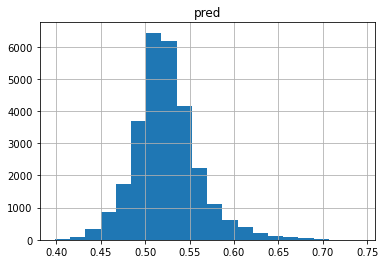

In [20]:
preds = []
for i in range(K):
    model = models[i]
    pred = model.predict(test_X)
    preds.append(pred)
    print(np.sum(pred) / pred.shape[0])
    
preds = np.array(preds)
preds = np.mean(preds, axis=0)
print(np.sum(preds) / preds.shape[0])


temp = pd.DataFrame({"pred":pred})
temp.hist(bins=20)

In [21]:
preds = np.where(preds < THRESHOLD, 0, 1)
print(np.sum(preds) / preds.shape[0])

submit_df = pd.DataFrame({'y': preds})
submit_df.index.name = 'id'
# submit_df.to_csv('Submissions/submission6.csv')

0.6775582215949189
